<a href="https://colab.research.google.com/github/Jaiquisic23/Artificial-Neural-Networks/blob/main/Jaime_Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
''''
It is a regression task. The goal is to predict diamond price using the basic
diamond properties. Use price columns as labels. Handle categorical features.
Split the dataset into training and validation subset. Create training and
validation pipeline. Try to reach minimum cost value and prevent over-fitting.

Some hints:
1. The easiest way to load a csv file is using Pandas read_csv method

2. You can handle categorical features using scikit-learn estimators:
OrdinalEncoder or OneHotEncoder.

3. Columns have different scales normalize them before training. For this
purpose you can use Tensorflow LayerNormalization layer.

3. It is a regression task so be aware of correct model architecture and cost
function. Typical regressions cost functions are: MAE, MSE. If you want to
predict output in range(0, 1000) then you can not use sigmoid activation
function in output layer.
'''

"'\nIt is a regression task. The goal is to predict diamond price using the basic\ndiamond properties. Use price columns as labels. Handle categorical features.\nSplit the dataset into training and validation subset. Create training and\nvalidation pipeline. Try to reach minimum cost value and prevent over-fitting.\n\nSome hints:\n1. The easiest way to load a csv file is using Pandas read_csv method\n\n2. You can handle categorical features using scikit-learn estimators:\nOrdinalEncoder or OneHotEncoder.\n\n3. Columns have different scales normalize them before training. For this\npurpose you can use Tensorflow LayerNormalization layer.\n\n3. It is a regression task so be aware of correct model architecture and cost\nfunction. Typical regressions cost functions are: MAE, MSE. If you want to\npredict output in range(0, 1000) then you can not use sigmoid activation\nfunction in output layer.\n"

In [148]:
from google.colab import files
dataload = files.upload()

import pandas as pd
import numpy as np
import io
import seaborn as sns
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from math import sqrt


from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso






Saving diamonds.csv to diamonds (7).csv


In [149]:
dataload = pd.read_csv(io.StringIO(dataload['diamonds.csv'].decode('utf-8')))

In [150]:
dataload.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [151]:
print('Shape:', dataload.shape)

Shape: (53940, 11)


In [152]:
dataload = dataload.drop(["Unnamed: 0"], axis=1)
dataload.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [153]:
dataload = dataload.drop(dataload[dataload["x"]==0].index)
dataload = dataload.drop(dataload[dataload["y"]==0].index)
dataload = dataload.drop(dataload[dataload["z"]==0].index)


In [154]:
print('Dataload after removing incorrect data')      #Every 0 in the line "min" means that there are diamonds without dimensions, so we eliminate them
dataload.describe(include = 'all')

Dataload after removing incorrect data


,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920,53920,53920,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21548,11284,13063,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797698,NaN,NaN,NaN,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,NaN,NaN,NaN,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000


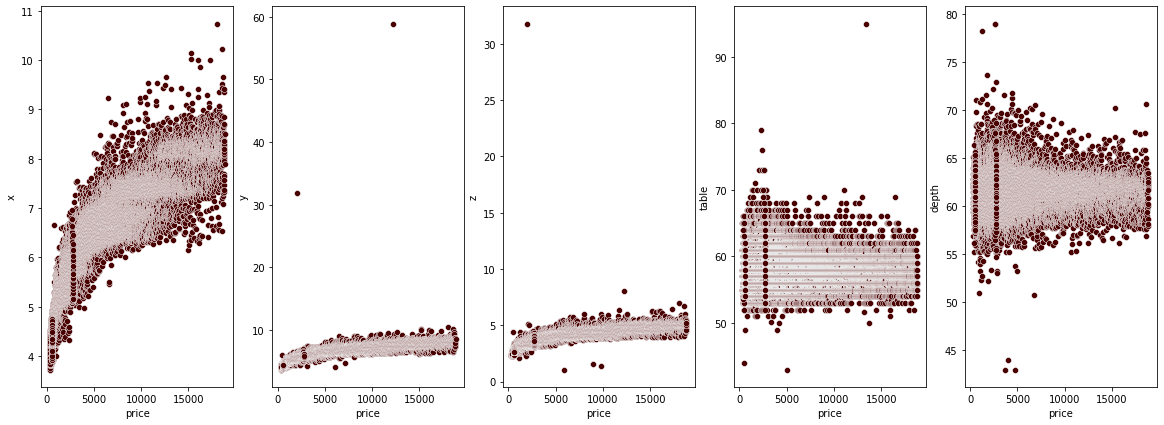

In [155]:
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = dataload, x = dataload['price'], y = dataload[i], ax = axs[c])
    c+=1

In [156]:
# Capping the columns, we will get cleaner results
dataload = dataload[(dataload['x'] < 30)]
dataload = dataload[(dataload['y'] < 30)]
dataload = dataload[(dataload['z'] < 30) & (dataload['z'] > 2)]
dataload = dataload[(dataload['table'] < 80) & (dataload['table'] > 40)]
dataload = dataload[(dataload['depth'] < 75) & (dataload['depth'] > 45)]

dataload.shape #13 rows have been removed

(53907, 10)

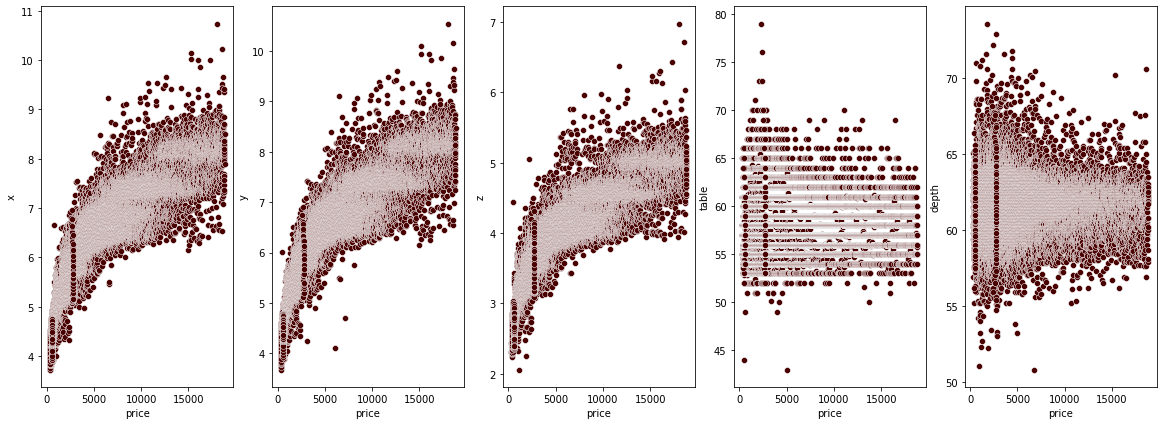

In [157]:
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = dataload, x = dataload['price'], y = dataload[i], ax = axs[c])
    c+=1

In [158]:
diamonds_num = dataload.copy()

In [159]:
X = diamonds_num.drop('price', axis = 1)
y = diamonds_num['price']

In [160]:
#Converting Categorial to numeric values
encoder = LabelEncoder()

X['cut'] = encoder.fit_transform(X['cut'])
cut_mappings = {index: label for index, label in enumerate(encoder.classes_)}

X['color'] = encoder.fit_transform(X['color'])
color_mappings = {index: label for index, label in enumerate(encoder.classes_)}

X['clarity'] = encoder.fit_transform(X['clarity'])
clarity_mappings = {index: label for index, label in enumerate(encoder.classes_)}


In [161]:
print(cut_mappings)
print(color_mappings)
print(clarity_mappings)

{0: 'Fair', 1: 'Good', 2: 'Ideal', 3: 'Premium', 4: 'Very Good'}
{0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}
{0: 'I1', 1: 'IF', 2: 'SI1', 3: 'SI2', 4: 'VS1', 5: 'VS2', 6: 'VVS1', 7: 'VVS2'}


In [162]:
diamonds_num = diamonds_num.rename(columns = {'color_numeric': 'color', 'cut_numeric': 'cut', 'clarity_numeric': 'clarity'})
diamonds_num.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [168]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [169]:
#splitting the dataset in test and train data. The Price will be the Target and the other columns the features:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(len(X_train))
print(len(X_test))

40430
13477


In [165]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8
0,0.006237,0.50,0.166667,0.428571,0.469298,0.333333,0.031384,0.043732,0.075203
1,0.002079,0.75,0.166667,0.285714,0.394737,0.500000,0.022825,0.023324,0.050813
2,0.006237,0.25,0.166667,0.571429,0.267544,0.611111,0.045649,0.056851,0.050813
3,0.018711,0.75,0.833333,0.714286,0.508772,0.416667,0.067047,0.080175,0.115854
4,0.022869,0.25,1.000000,0.428571,0.548246,0.416667,0.087019,0.097668,0.140244
...,...,...,...,...,...,...,...,...,...
53902,0.108108,0.50,0.000000,0.285714,0.438596,0.388889,0.288160,0.303207,0.292683
53903,0.108108,0.25,0.000000,0.285714,0.539474,0.333333,0.279601,0.301749,0.315041
53904,0.103950,1.00,0.000000,0.285714,0.526316,0.472222,0.275321,0.291545,0.304878
53905,0.137214,0.75,0.666667,0.428571,0.447368,0.416667,0.345221,0.355685,0.341463


In [166]:
model = tf.keras.Sequential([                             
                             tf.keras.layers.Dense(30, activation='relu'),
                             tf.keras.layers.Dense(10, activation='relu'),                              
                             tf.keras.layers.Dense(1, activation='relu')
                             ])

model.compile(loss=tf.keras.losses.mse, 
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),  
              metrics=["MAE"]) 

model.fit(X_train,y_train, epochs=60)

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1264/1264 [==============================] - 3s 2ms/step - loss: 31009002.0000 - MAE: 3856.5193
Epoch 2/60
1264/1264 [==============================] - 3s 2ms/step - loss: 27288938.0000 - MAE: 3381.0947
Epoch 3/60
1264/1264 [==============================] - 3s 2ms/step - loss: 21043940.0000 - MAE: 2883.9231
Epoch 4/60
1264/1264 [==============================] - 3s 2ms/step - loss: 16651660.0000 - MAE: 2821.8643
Epoch 5/60
1264/1264 [==============================] - 3s 2ms/step - loss: 15492992.0000 - MAE: 2942.1338
Epoch 6/60
1264/1264 [==============================] - 3s 2ms/step - loss: 15360466.0000 - MAE: 2987.9585
Epoch 7/60
1264/1264 [==============================] - 3s 2ms/step - loss: 15276729.0000 - MAE: 2984.4927
Epoch 8/60
1264/1264 [==============================] - 3s 2ms/step - loss: 15188462.0000 - MAE: 2971.5422
Epoch 9/60
1264/1264 [==============================] - 3s 2ms/step - loss: 15097588.0000 - MAE: 2969.6104
Epoch 10/60
1264/1264 [=========================

In [167]:
train = model.predict(X_train)
print(mean_absolute_error(y_train,train))

pred = model.predict(X_test)
print(mean_absolute_error(y_test,pred))

1264/1264 [==============================] - 2s 1ms/step
679.0447028964692
422/422 [==============================] - 1s 1ms/step
670.3866906236486
